**Filtering**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20, 10)

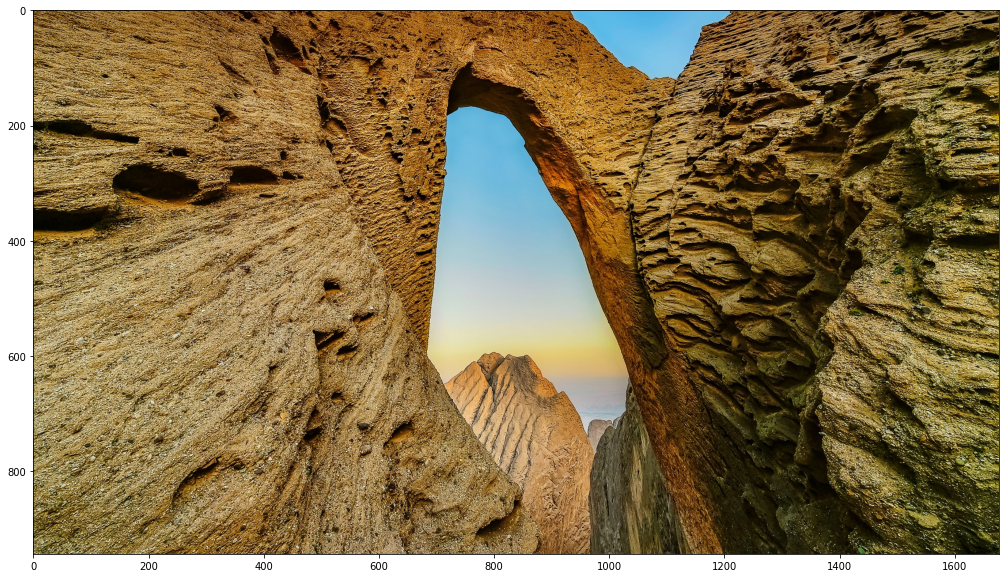

In [8]:
image1_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/HighArchChina.jpg')
image1_original = cv2.cvtColor(image1_original, cv2.COLOR_BGR2RGB)
plt.imshow(image1_original)
last_processed_image = image1_original

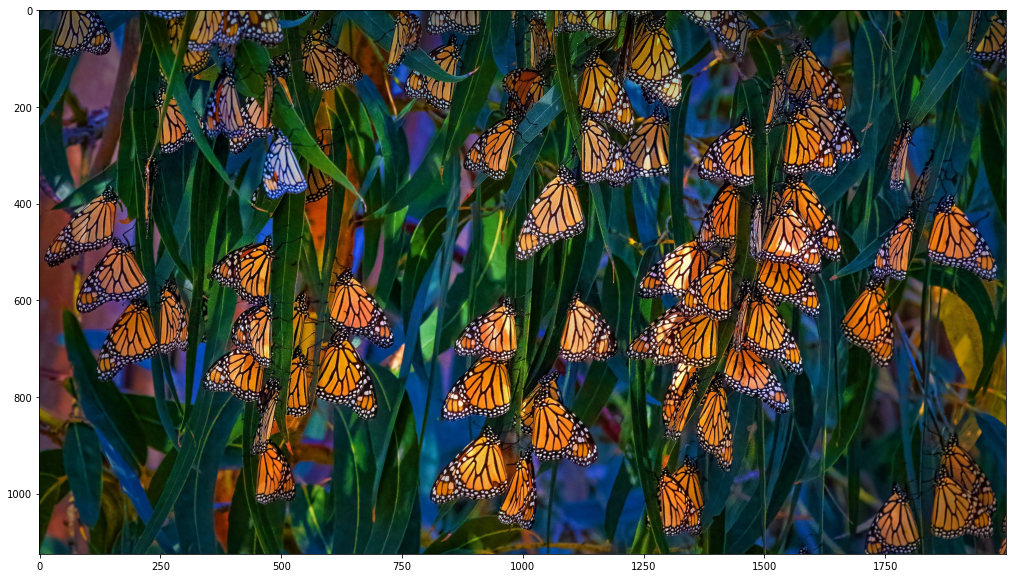

In [9]:
image2_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/MonarchPismo.jpg')
image2_original = cv2.cvtColor(image2_original, cv2.COLOR_BGR2RGB)
plt.imshow(image2_original)
last_processed_image = image2_original

# Smoothing (box filter)

In [3]:
kernel_width = 5
kernel = np.ones(shape=(kernel_width, kernel_width)) / (kernel_width**2)

filter-2D in different Libs
```
cv2.filter2D
scipy.signal.convolve2D
```



# some arbitrary [kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))

## edge detection

In [ ]:
kernel = np.array([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])

## emboss filter

In [ ]:
kernel = np.array([
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2]
])

## horizontal [sobel](https://en.wikipedia.org/wiki/Sobel_operator) filter

In [ ]:
kernel = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
])

# Smoothing using Gaussian filter

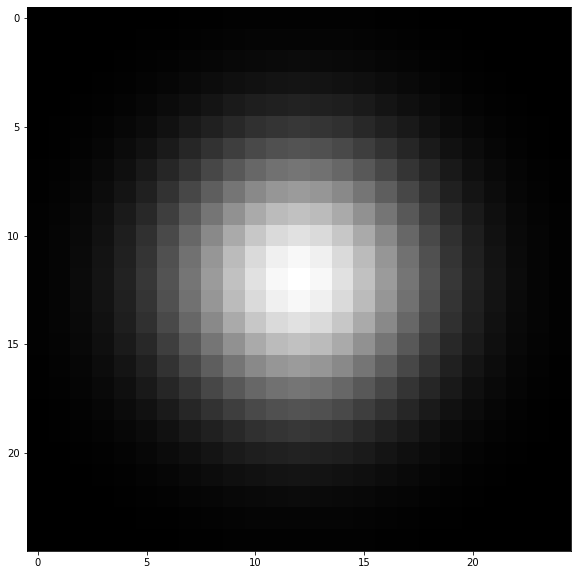

In [11]:
σ = 4
kernel_width = 25
μ = (kernel_width - 1) / 2
gaussianFilter = np.zeros((kernel_width, kernel_width),dtype = np.float32)

for i in range(kernel_width):
  for j in range(kernel_width):
    gaussianFilter[i,j] = np.exp(-((i - μ)**2 + (j - μ)**2)/(2 * σ**2))
gaussianFilter = gaussianFilter/np.sum(gaussianFilter) #normalizing
kernel = gaussianFilter
plt.imshow(gaussianFilter, cmap='gray')

# sharpening image

run gaussian kernel cell just before running folowing cells

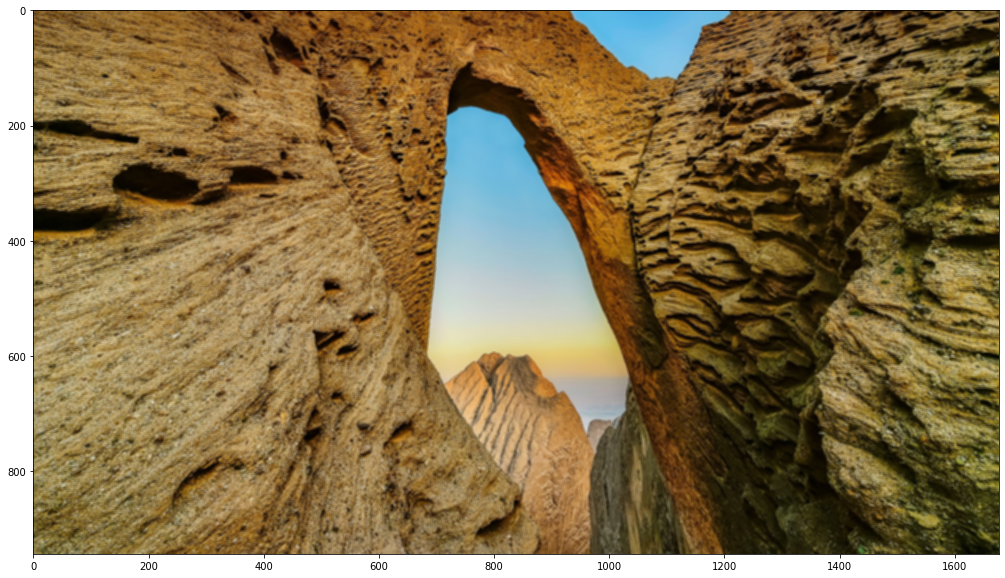

In [4]:
image_original = last_processed_image.copy()
blured_image = cv2.filter2D(src=last_processed_image.copy(), ddepth=-1, kernel=kernel).astype(np.uint8)
plt.imshow(blured_image)
last_processed_image = blured_image


In [ ]:
unsharp_mask = image_original - blured_image
plt.imshow(unsharp_mask)
last_processed_image = unsharp_mask

Output hidden; open in https://colab.research.google.com to view.

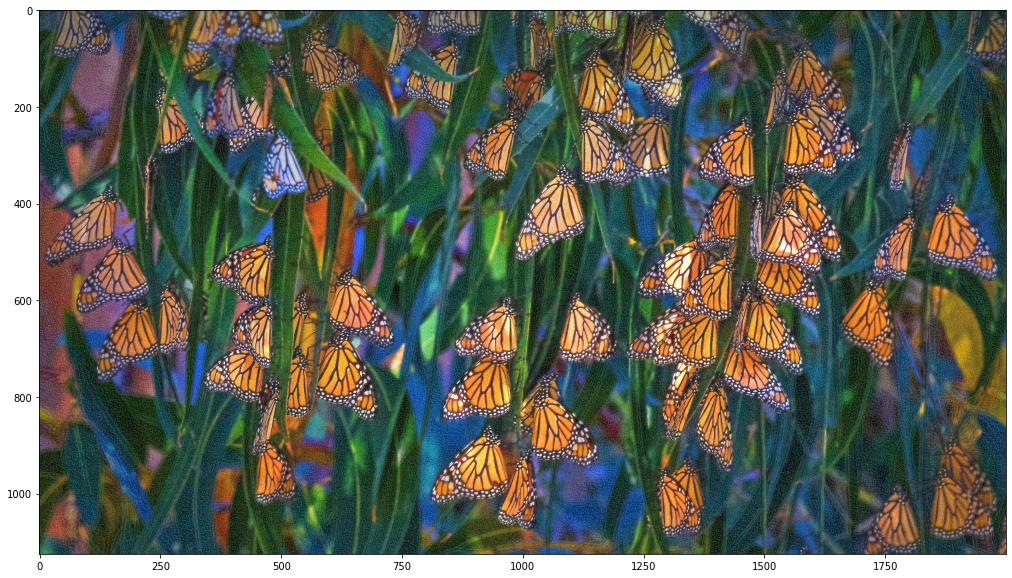

In [ ]:
α = 0.2
sharpened_image = image_original + α*unsharp_mask
sharpened_image[sharpened_image < 0] = 0
sharpened_image[sharpened_image > 255] = 255
sharpened_image = sharpened_image.astype(np.uint8)
plt.imshow(sharpened_image)
# last_processed_image = sharpened_image

# sharpener filter

In [5]:
kernel = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])

# convolve

In [7]:
filtered_image = cv2.filter2D(src=last_processed_image.copy(), ddepth=-1, kernel=kernel).astype(np.uint8)
plt.imshow(filtered_image)
last_processed_image = filtered_image

Output hidden; open in https://colab.research.google.com to view.

# Image Sampling

## sampling

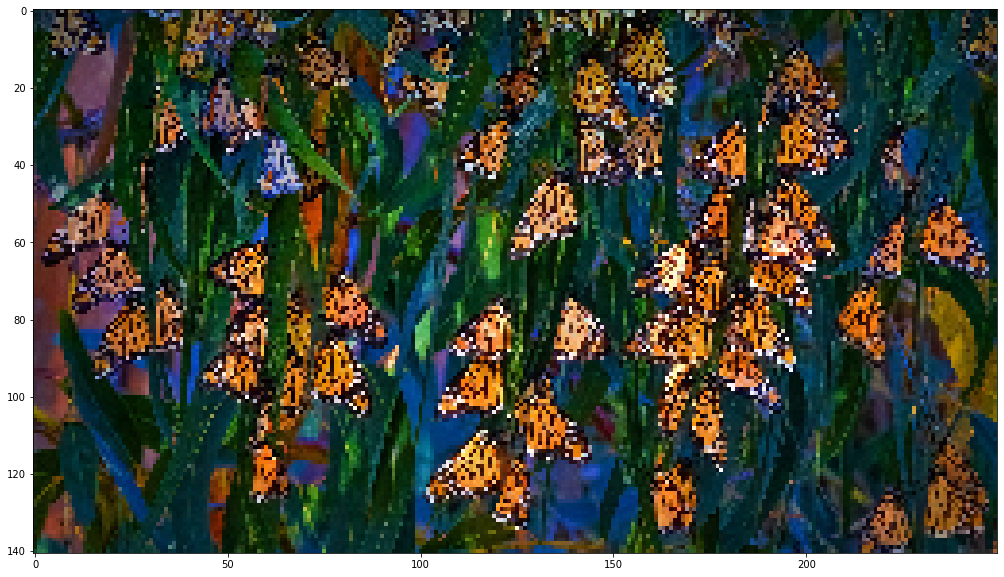

In [10]:
sampled_image = last_processed_image[::8,::8,:]
plt.imshow(sampled_image)
# last_processed_image = sampled_image

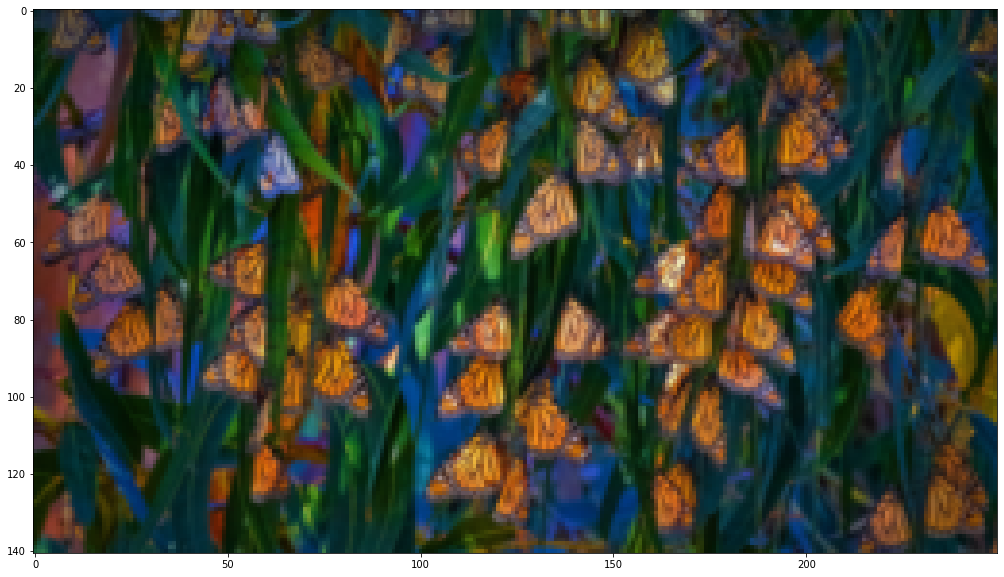

In [13]:
blured_image = cv2.filter2D(src=last_processed_image.copy(), ddepth=-1, kernel=kernel).astype(np.uint8)
sampled_image = blured_image[::8,::8,:]
plt.imshow(sampled_image)

see also ["pyramid representation"](https://en.wikipedia.org/wiki/Pyramid_(image_processing)) on [scikit-image](https://scikit-image.org/docs/stable/auto_examples/transform/plot_pyramid.html)

# References:


*   Gonzalez: Sec 3.4-3.5
*   Szeliski: Sec 3.2